# Your info

Full name: Melika Ahmadi Ranjbar

Student ID: 97521036

# Q1. Hopfield

## Q1.2

In [47]:
# Q1.2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

# First of all we should create the weight matrix.
# We'll do this using Hebbian weight change.
# In this question we have two patterns to learn.
# Patterns: (1, 1, 1, -1, -1, -1) & (1, -1, 1, -1, 1, -1)
# We have 6 neurons.


def WeightMatrix(Patterns, Neurons):

    Weights = np.zeros([Neurons, Neurons])
    for k in range(len(Patterns)):

        for i in range(Neurons):
            for j in range(Neurons):

                if i is not j:
                    Weights[i][j] += Patterns[k][i] * Patterns[k][j]
        
    return Weights

# Now that we've trained the network, we should test it's result.
def Activation(Weights, Pattern, Neurons):
    Result = np.zeros(Neurons)
    for i in range(Neurons):
        Sum = 0
        for j in range(Neurons):
            Sum += Weights[i][j] * Pattern[j]
        if Sum >= 0 and Pattern[i] > 0:
            Result[i] = 1
        elif Sum < 0 and Pattern[i] < 0:
            Result[i] = 1
        else:
            Result[i] = 0

    return Result
    

def UpdatePattern(Weights, Pattern, Neurons):

    Result = Activation(Weights, Pattern, Neurons)

    if np.all(Result == 1):
        print("Pattern is stable: ", Pattern)
        return
        
    print("This is initial pattern: ", Pattern, "\nStart finding nearest pattern.")
    while not np.all(Result == 1):
        # Start updating the pattern.
        for i in range(Neurons):
            Sum = 0
            for j in range(Neurons):
                Sum += Weights[i][j] * Pattern[j]
            if Sum >= 0:
                Pattern[i] = 1
            elif Sum < 0:
                Pattern[i] = -1
        Result = Activation(Weights, Pattern, Neurons) 

    
    if np.all(Result == 1):
        print("Nearest pattern: ", Pattern)
        

In [6]:
# Q1.2_graded
# Do not change the above line.

# This cell is for your codes.

Neurons = 6

Patterns = [[1, 1, 1, -1, -1, -1], [1, -1, 1, -1, 1, -1]]
Weights = WeightMatrix(Patterns, Neurons)

TestPattern = [1, 1, 1, -1, -1, -1]
UpdatePattern(Weights, TestPattern, Neurons)

TestPattern = [-1, 1, 1, -1, -1, -1]
UpdatePattern(Weights, TestPattern, Neurons)


Pattern is stable:  [1, 1, 1, -1, -1, -1]
This is initial pattern:  [-1, 1, 1, -1, -1, -1] 
Start finding nearest pattern.
Nearest pattern:  [1, 1, 1, -1, -1, -1]


## Q1.3

In [43]:
# Q1.3_graded
# Do not change the above line.

# This cell is for your imports.
# This question is almost same as the previous one, with minute difference.
# Here weve to learn images.
import numpy as np
import math

# First we do the learning step.
def WeightMatrix(Patterns, Neurons):

    Weights = np.zeros([Neurons, Neurons])
    for k in range(len(Patterns)):

        for i in range(Neurons):
            for j in range(Neurons):

                if i is not j:
                    Weights[i][j] += Patterns[k][i] * Patterns[k][j]
        
    return Weights
    
# Now that we've trained the network, we should test it's result.
def Activation(Weights, Pattern, OriginalPattern, Neurons):
    Equal = None
    Result = np.zeros(Neurons)
    for i in range(Neurons):
        Sum = 0
        for j in range(Neurons):
            Sum += Weights[i][j] * Pattern[j]
        if Sum >= 0:
            Result[i] = 1
        elif Sum < 0:
            Result[i] = -1

    Comparison = Result == OriginalPattern
    Equal = Comparison.all()

    return Result, Equal
    

def UpdatePattern(Weights, Pattern, Neurons, Iterations):
    OriginalPattern = Pattern
    Result, Equal = Activation(Weights, Pattern, OriginalPattern, Neurons)

    energyResult = []
    e = Energy(Weights, Pattern)
    energyResult.append(e)

    if Equal is True:
        print("Image is already the pattern: ", ArrayToImage(Pattern, Neurons))
        return
        
    print("This is initial image: ", ArrayToImage(Pattern, Neurons), "\nStart finding nearest image.")
    for j in range(Iterations):
        # Start updating the pattern.
        Pattern, Equal = Activation(Weights, Pattern, OriginalPattern, Neurons)
        e = Energy(Weights, Pattern)
        energyResult.append(e)
        if Equal is True:
            break
        elif energyResult[-1] == energyResult[-2]:
            break

    
    print("Nearest image: ", ArrayToImage(Pattern, Neurons))
    return Pattern

def ImageToArray(Pattern, Neurons, Name):
    
    # Now we've to convert it into one-dimensional array.
    # But first resize the picture.
    Im = Image.open(Name)
    Result = Im.resize((int(math.sqrt(Neurons)), int(math.sqrt(Neurons))))
    Result.save(f"{Name}")


    ResultArray = np.asarray(Result)
    ResultArrayFinal = ResultArray.reshape(Neurons, )


    return ResultArrayFinal

def ConvertToBinary(Input):

    FinalResult = np.zeros(Neurons)
    FinalResult[Input >= 80] = 1
    FinalResult[FinalResult == 0] = -1

    return FinalResult

def AddNoise(Amount, Input, Neurons):
    Input = Input + np.random.normal(0, Amount, Neurons)

    return ConvertToBinary(Input)

def ArrayToImage(Data, Neurons):

    y = np.zeros(Neurons, )
    y[Data == 1] = 255
    y[Data == -1] = 0
    
    y = np.reshape(y, (int(math.sqrt(Neurons)), int(math.sqrt(Neurons))))
    img = Image.fromarray(np.uint8(y))

    plt.imshow(img)
    plt.show()
    return "Done"

def Energy(Weight, Input):
    eng = -0.5 * np.matmul(np.matmul(Input.T, Weight), Input)
    return eng

def Precision(Result, Original, Neurons):
    Diff = np.equal(Original, Result)
    return np.count_nonzero(Diff) / Neurons * 100


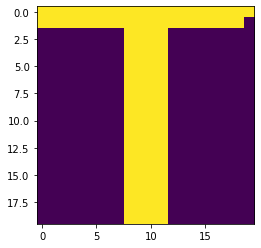

This is initial image:  Done 
Start finding nearest image.


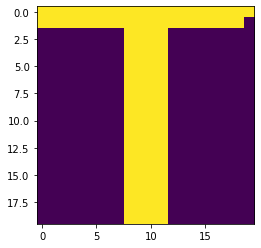

Nearest image:  Done
Accuracy: % 100.0


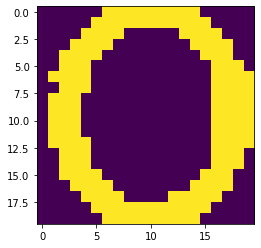

This is initial image:  Done 
Start finding nearest image.


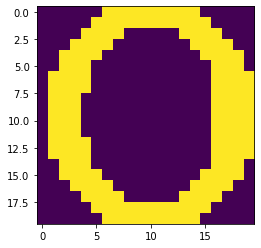

Nearest image:  Done
Accuracy: % 100.0


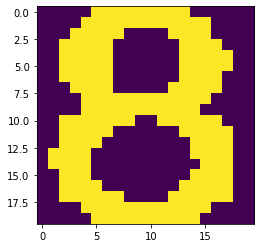

This is initial image:  Done 
Start finding nearest image.


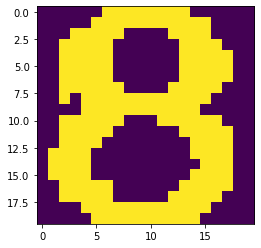

Nearest image:  Done
Accuracy: % 99.0


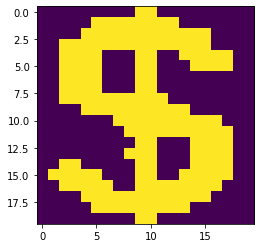

This is initial image:  Done 
Start finding nearest image.


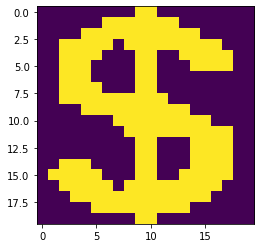

Nearest image:  Done
Accuracy: % 100.0


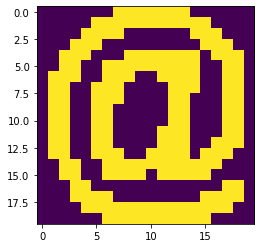

This is initial image:  Done 
Start finding nearest image.


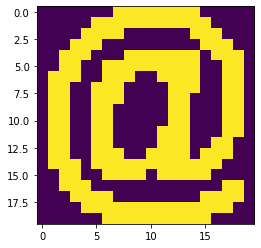

Nearest image:  Done
Accuracy: % 100.0
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 16 with 10% error in images of different alphabet:  99.8


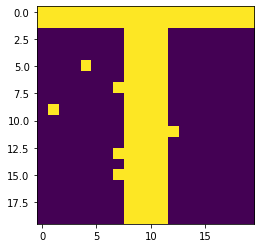

This is initial image:  Done 
Start finding nearest image.


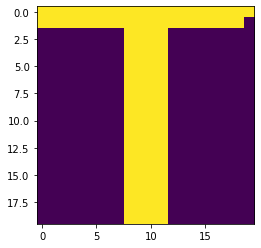

Nearest image:  Done
Accuracy: % 100.0


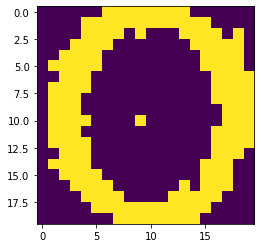

This is initial image:  Done 
Start finding nearest image.


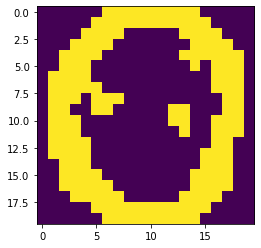

Nearest image:  Done
Accuracy: % 91.5


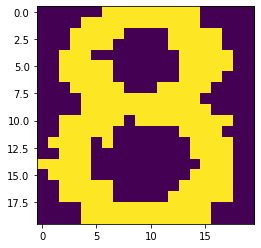

This is initial image:  Done 
Start finding nearest image.


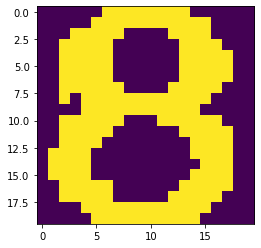

Nearest image:  Done
Accuracy: % 99.0


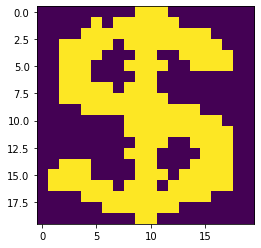

This is initial image:  Done 
Start finding nearest image.


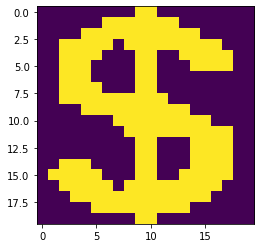

Nearest image:  Done
Accuracy: % 100.0


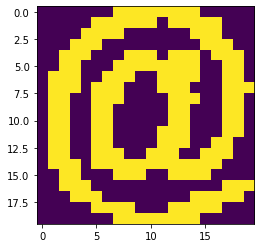

This is initial image:  Done 
Start finding nearest image.


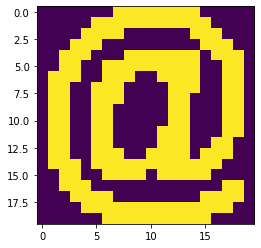

Nearest image:  Done
Accuracy: % 100.0
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 16 with 30% error in images of different alphabet:  98.1


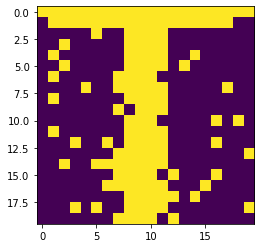

This is initial image:  Done 
Start finding nearest image.


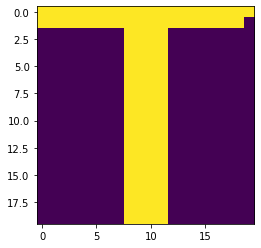

Nearest image:  Done
Accuracy: % 100.0


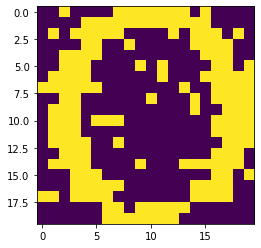

This is initial image:  Done 
Start finding nearest image.


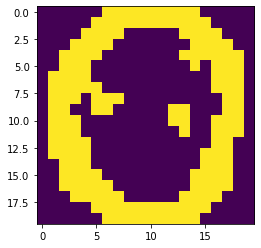

Nearest image:  Done
Accuracy: % 91.5


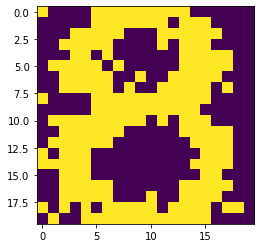

This is initial image:  Done 
Start finding nearest image.


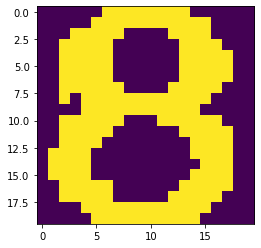

Nearest image:  Done
Accuracy: % 99.0


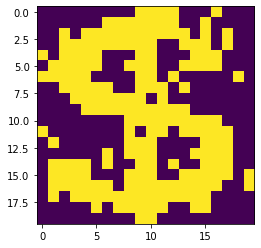

This is initial image:  Done 
Start finding nearest image.


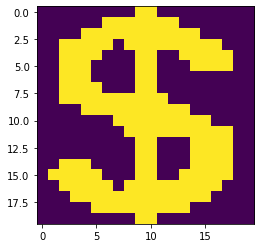

Nearest image:  Done
Accuracy: % 100.0


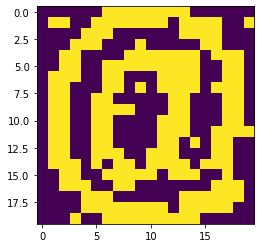

This is initial image:  Done 
Start finding nearest image.


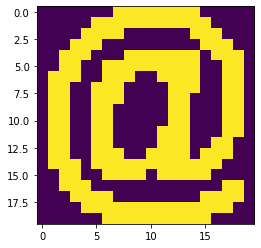

Nearest image:  Done
Accuracy: % 100.0
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 16 with 60% error in images of different alphabet:  98.1
***___***___***___***___***___***___***___***___***___***___***___***


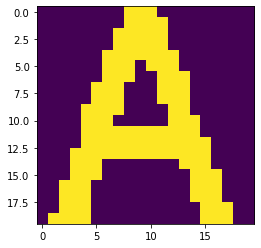

This is initial image:  Done 
Start finding nearest image.


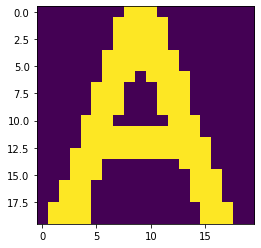

Nearest image:  Done
Accuracy: % 100.0


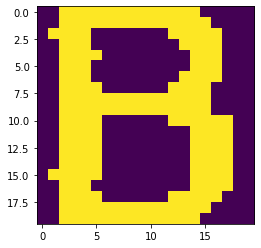

This is initial image:  Done 
Start finding nearest image.


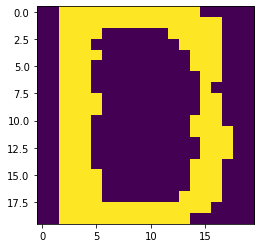

Nearest image:  Done
Accuracy: % 89.5


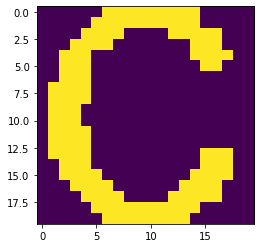

This is initial image:  Done 
Start finding nearest image.


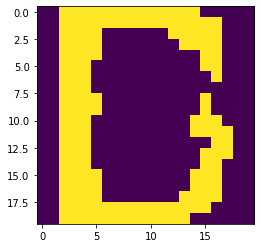

Nearest image:  Done
Accuracy: % 86.25


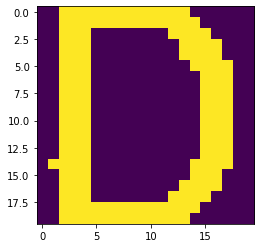

This is initial image:  Done 
Start finding nearest image.


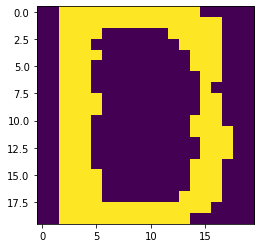

Nearest image:  Done
Accuracy: % 94.25


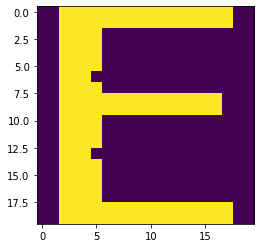

This is initial image:  Done 
Start finding nearest image.


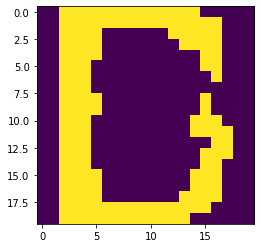

Nearest image:  Done
Accuracy: % 81.25


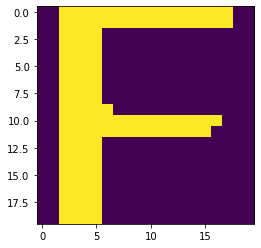

This is initial image:  Done 
Start finding nearest image.


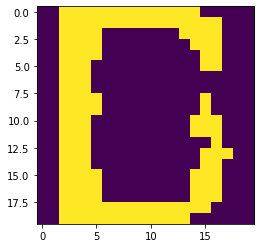

Nearest image:  Done
Accuracy: % 81.25


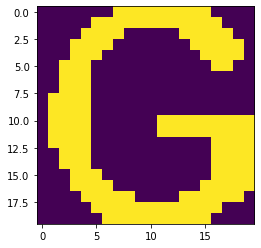

This is initial image:  Done 
Start finding nearest image.


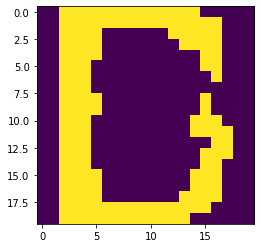

Nearest image:  Done
Accuracy: % 78.75


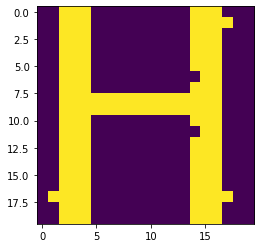

This is initial image:  Done 
Start finding nearest image.


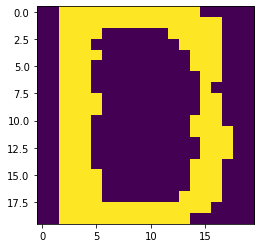

Nearest image:  Done
Accuracy: % 80.75


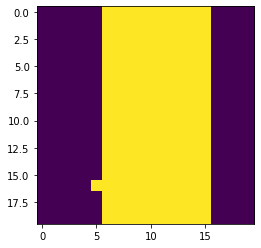

This is initial image:  Done 
Start finding nearest image.


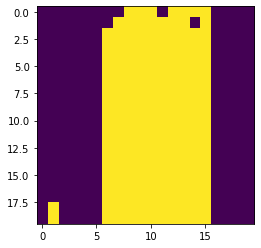

Nearest image:  Done
Accuracy: % 98.25


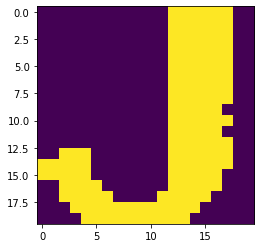

This is initial image:  Done 
Start finding nearest image.


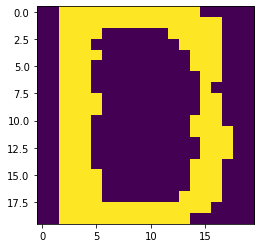

Nearest image:  Done
Accuracy: % 70.25
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 16 with 10% error in images:  86.05


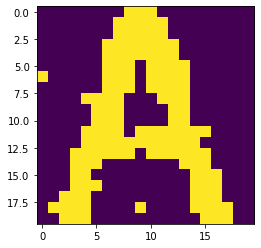

This is initial image:  Done 
Start finding nearest image.


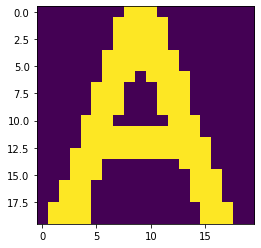

Nearest image:  Done
Accuracy: % 100.0


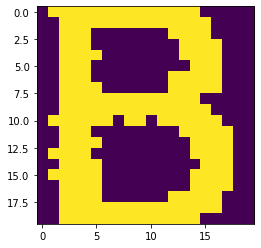

This is initial image:  Done 
Start finding nearest image.


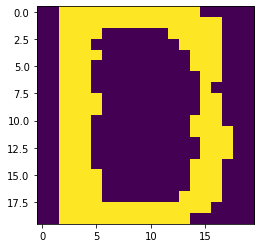

Nearest image:  Done
Accuracy: % 89.5


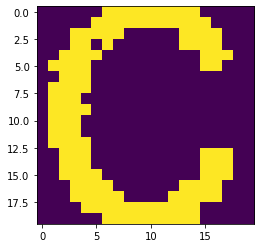

This is initial image:  Done 
Start finding nearest image.


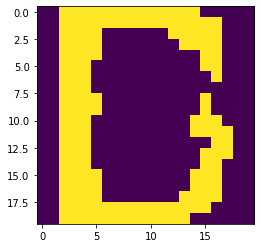

Nearest image:  Done
Accuracy: % 86.25


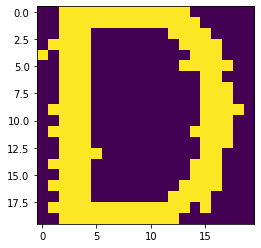

This is initial image:  Done 
Start finding nearest image.


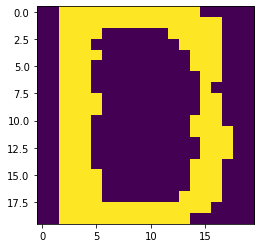

Nearest image:  Done
Accuracy: % 94.25


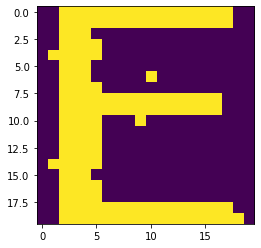

This is initial image:  Done 
Start finding nearest image.


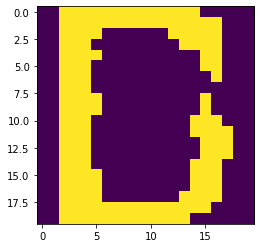

Nearest image:  Done
Accuracy: % 80.5


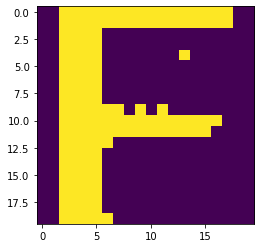

This is initial image:  Done 
Start finding nearest image.


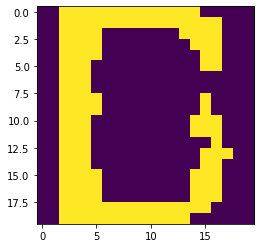

Nearest image:  Done
Accuracy: % 81.25


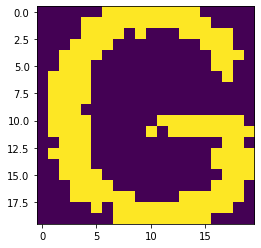

This is initial image:  Done 
Start finding nearest image.


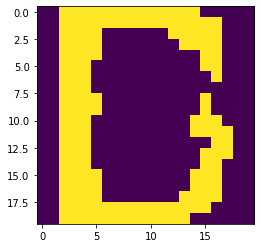

Nearest image:  Done
Accuracy: % 78.75


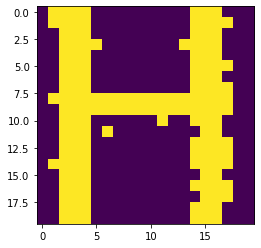

This is initial image:  Done 
Start finding nearest image.


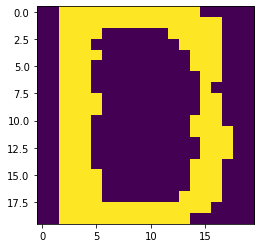

Nearest image:  Done
Accuracy: % 80.75


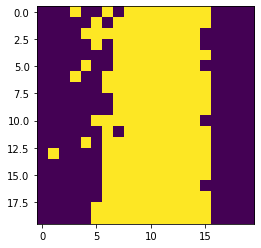

This is initial image:  Done 
Start finding nearest image.


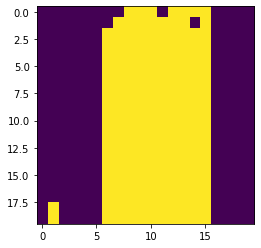

Nearest image:  Done
Accuracy: % 98.25


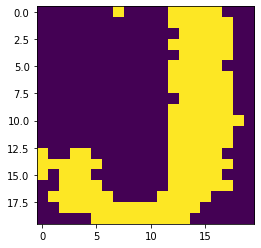

This is initial image:  Done 
Start finding nearest image.


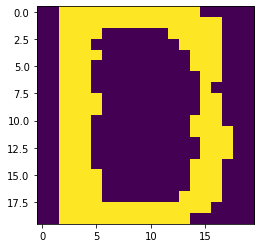

Nearest image:  Done
Accuracy: % 70.25
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 16 with 10% error in images:  85.975


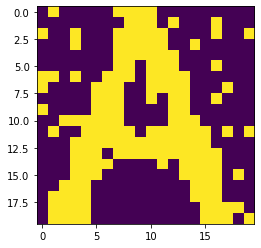

This is initial image:  Done 
Start finding nearest image.


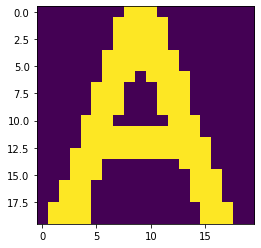

Nearest image:  Done
Accuracy: % 100.0


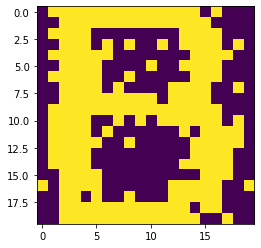

This is initial image:  Done 
Start finding nearest image.


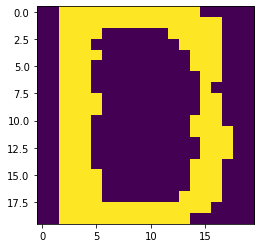

Nearest image:  Done
Accuracy: % 89.5


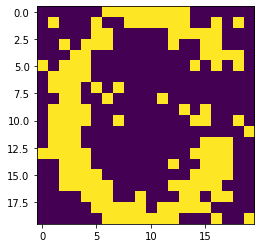

This is initial image:  Done 
Start finding nearest image.


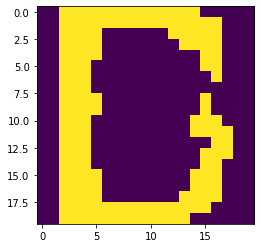

Nearest image:  Done
Accuracy: % 86.25


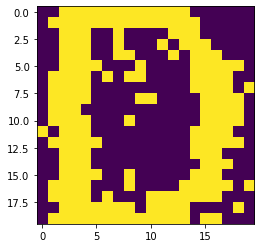

This is initial image:  Done 
Start finding nearest image.


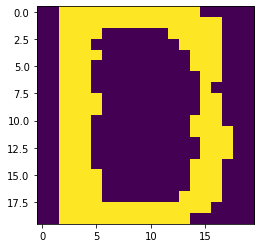

Nearest image:  Done
Accuracy: % 94.25


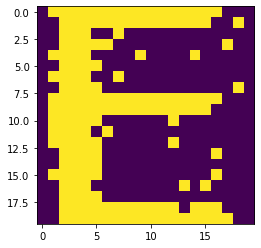

This is initial image:  Done 
Start finding nearest image.


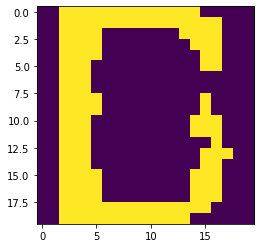

Nearest image:  Done
Accuracy: % 82.75


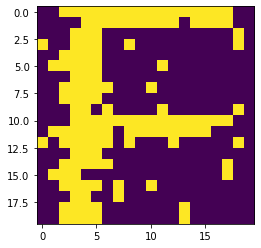

This is initial image:  Done 
Start finding nearest image.


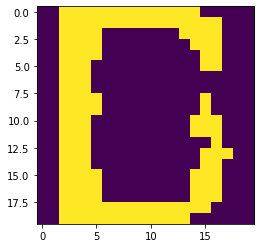

Nearest image:  Done
Accuracy: % 81.25


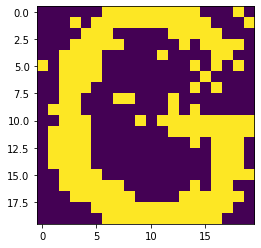

This is initial image:  Done 
Start finding nearest image.


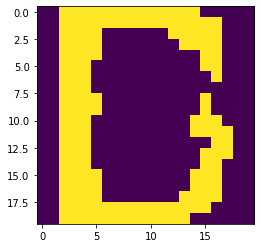

Nearest image:  Done
Accuracy: % 78.75


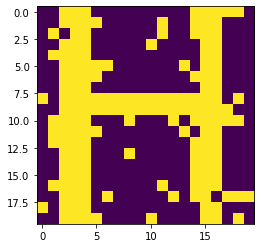

This is initial image:  Done 
Start finding nearest image.


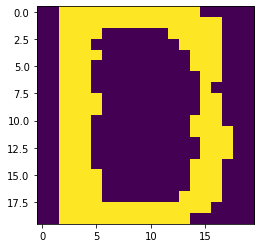

Nearest image:  Done
Accuracy: % 80.75


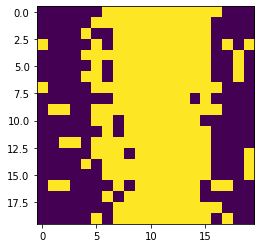

This is initial image:  Done 
Start finding nearest image.


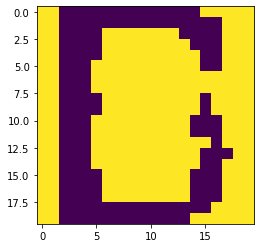

Nearest image:  Done
Accuracy: % 56.99999999999999


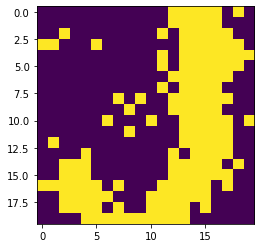

This is initial image:  Done 
Start finding nearest image.


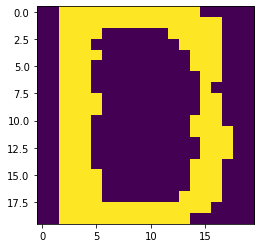

Nearest image:  Done
Accuracy: % 70.25
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 16 with 10% error in images:  82.075
***___***___***___***___***___***___***___***___***___***___***___***


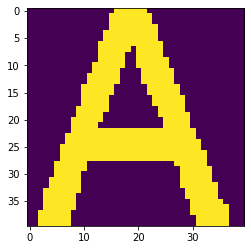

This is initial image:  Done 
Start finding nearest image.


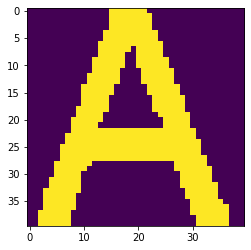

Nearest image:  Done
Accuracy: % 100.0


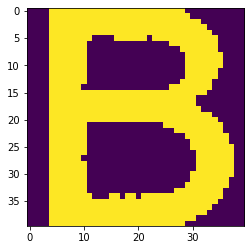

This is initial image:  Done 
Start finding nearest image.


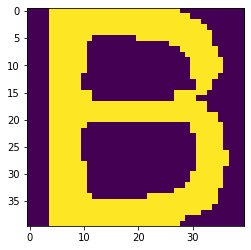

Nearest image:  Done
Accuracy: % 94.375


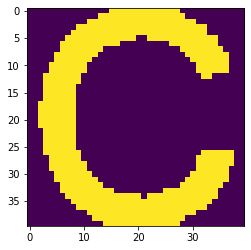

This is initial image:  Done 
Start finding nearest image.


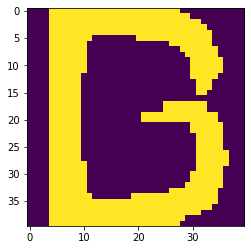

Nearest image:  Done
Accuracy: % 83.3125


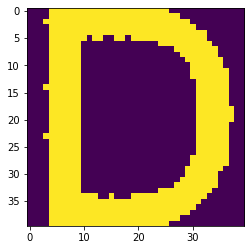

This is initial image:  Done 
Start finding nearest image.


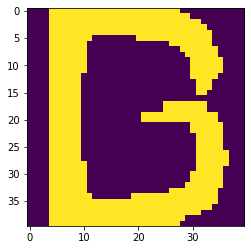

Nearest image:  Done
Accuracy: % 91.6875


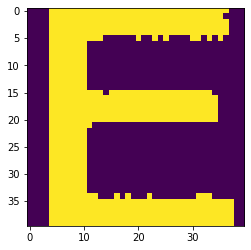

This is initial image:  Done 
Start finding nearest image.


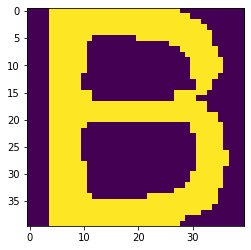

Nearest image:  Done
Accuracy: % 83.625


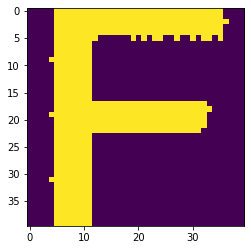

This is initial image:  Done 
Start finding nearest image.


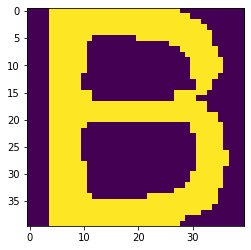

Nearest image:  Done
Accuracy: % 75.5625


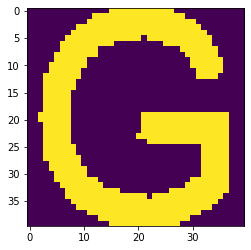

This is initial image:  Done 
Start finding nearest image.


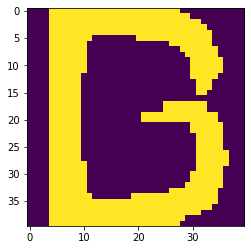

Nearest image:  Done
Accuracy: % 83.625


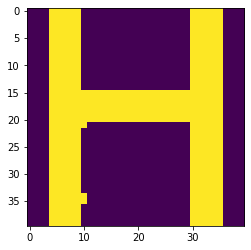

This is initial image:  Done 
Start finding nearest image.


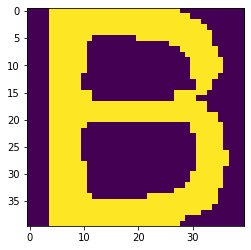

Nearest image:  Done
Accuracy: % 78.0625


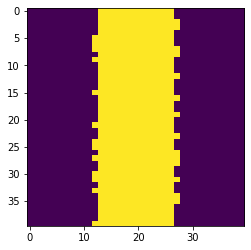

This is initial image:  Done 
Start finding nearest image.


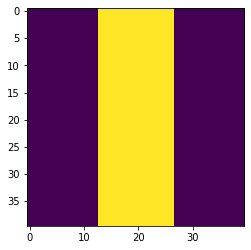

Nearest image:  Done
Accuracy: % 100.0


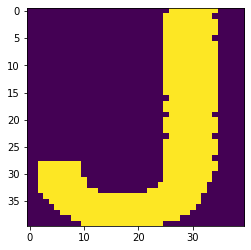

This is initial image:  Done 
Start finding nearest image.


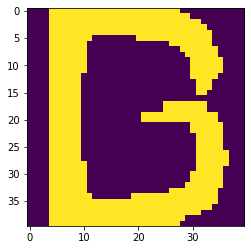

Nearest image:  Done
Accuracy: % 68.9375
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 32 with 10% error in images:  85.91875


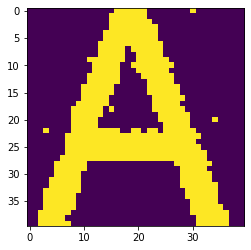

This is initial image:  Done 
Start finding nearest image.


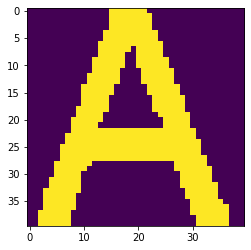

Nearest image:  Done
Accuracy: % 100.0


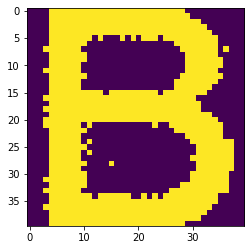

This is initial image:  Done 
Start finding nearest image.


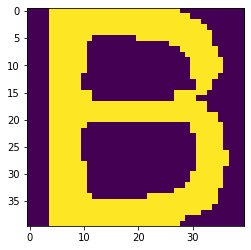

Nearest image:  Done
Accuracy: % 94.375


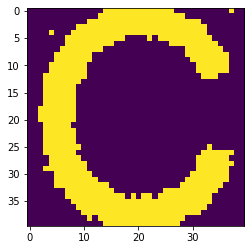

This is initial image:  Done 
Start finding nearest image.


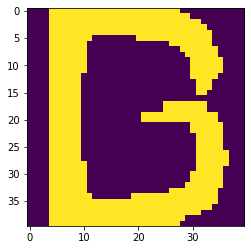

Nearest image:  Done
Accuracy: % 83.3125


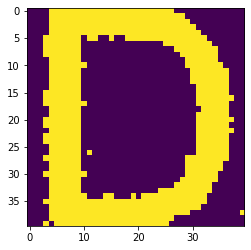

This is initial image:  Done 
Start finding nearest image.


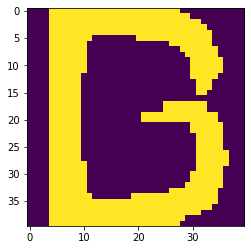

Nearest image:  Done
Accuracy: % 91.6875


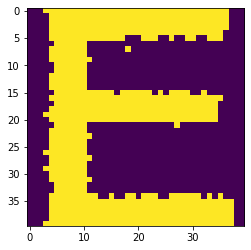

This is initial image:  Done 
Start finding nearest image.


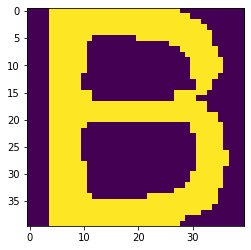

Nearest image:  Done
Accuracy: % 83.625


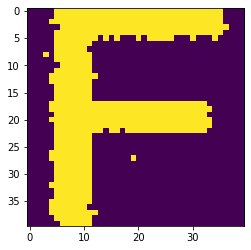

This is initial image:  Done 
Start finding nearest image.


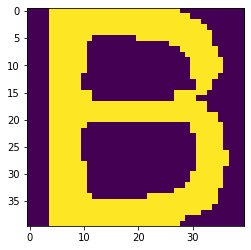

Nearest image:  Done
Accuracy: % 75.5625


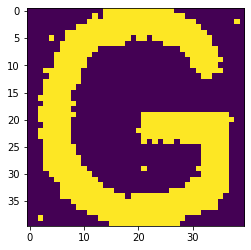

This is initial image:  Done 
Start finding nearest image.


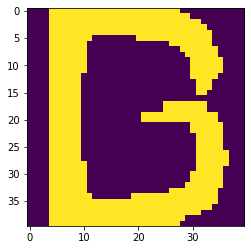

Nearest image:  Done
Accuracy: % 83.625


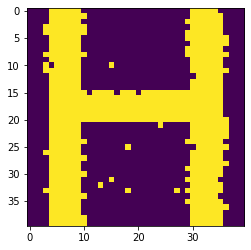

This is initial image:  Done 
Start finding nearest image.


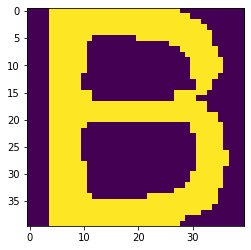

Nearest image:  Done
Accuracy: % 78.0625


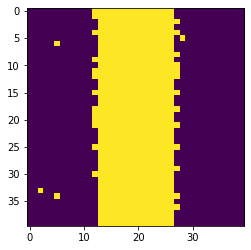

This is initial image:  Done 
Start finding nearest image.


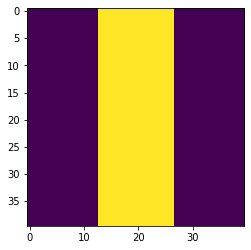

Nearest image:  Done
Accuracy: % 100.0


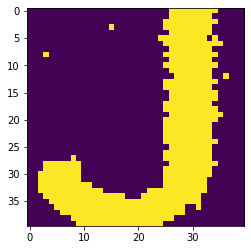

This is initial image:  Done 
Start finding nearest image.


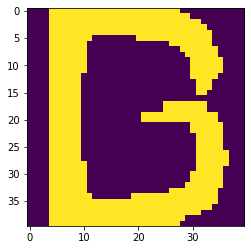

Nearest image:  Done
Accuracy: % 68.9375
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 32 with 30% error in images:  85.91875


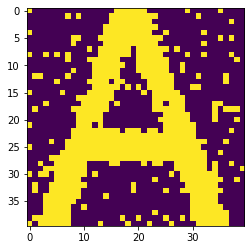

This is initial image:  Done 
Start finding nearest image.


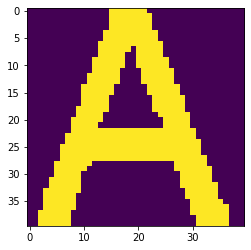

Nearest image:  Done
Accuracy: % 100.0


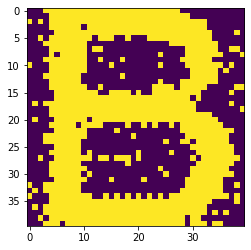

This is initial image:  Done 
Start finding nearest image.


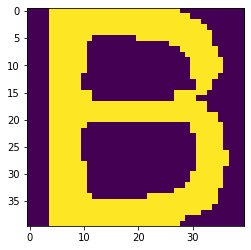

Nearest image:  Done
Accuracy: % 94.375


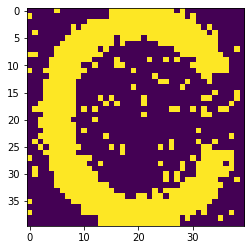

This is initial image:  Done 
Start finding nearest image.


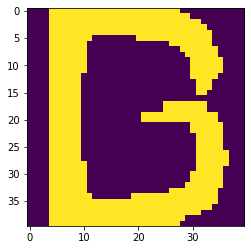

Nearest image:  Done
Accuracy: % 83.3125


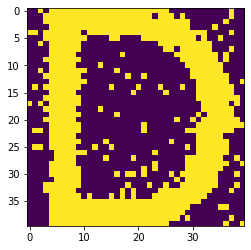

This is initial image:  Done 
Start finding nearest image.


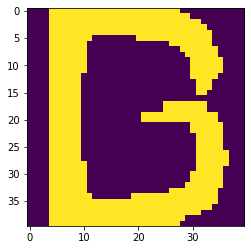

Nearest image:  Done
Accuracy: % 91.6875


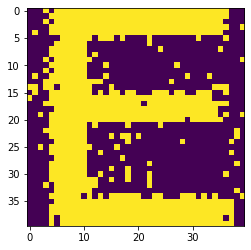

This is initial image:  Done 
Start finding nearest image.


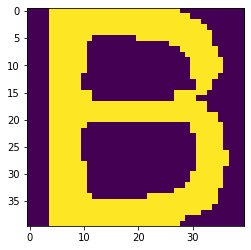

Nearest image:  Done
Accuracy: % 83.625


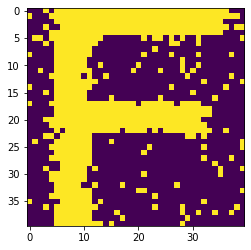

This is initial image:  Done 
Start finding nearest image.


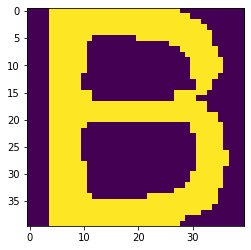

Nearest image:  Done
Accuracy: % 75.5625


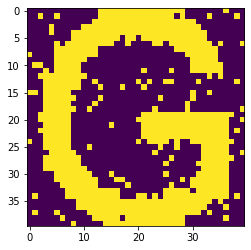

This is initial image:  Done 
Start finding nearest image.


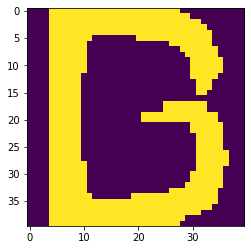

Nearest image:  Done
Accuracy: % 83.625


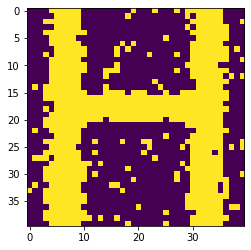

This is initial image:  Done 
Start finding nearest image.


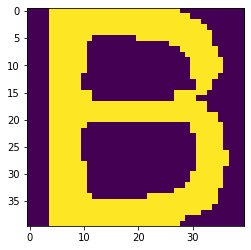

Nearest image:  Done
Accuracy: % 78.0625


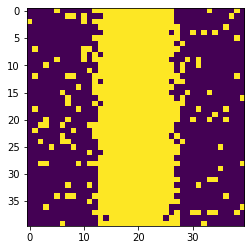

This is initial image:  Done 
Start finding nearest image.


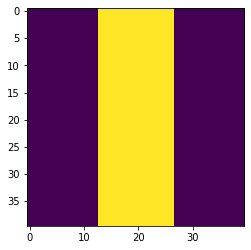

Nearest image:  Done
Accuracy: % 100.0


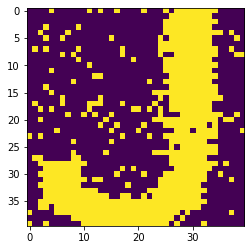

This is initial image:  Done 
Start finding nearest image.


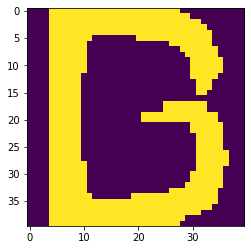

Nearest image:  Done
Accuracy: % 68.9375
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 32 with 60% error in images:  85.91875
***___***___***___***___***___***___***___***___***___***___***___***


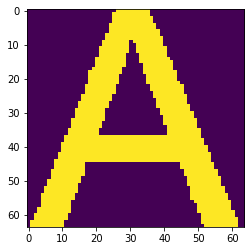

This is initial image:  Done 
Start finding nearest image.


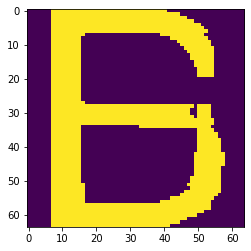

Nearest image:  Done
Accuracy: % 54.4677734375


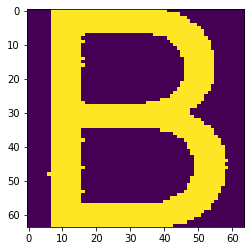

This is initial image:  Done 
Start finding nearest image.


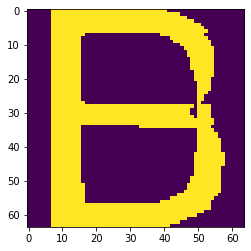

Nearest image:  Done
Accuracy: % 95.263671875


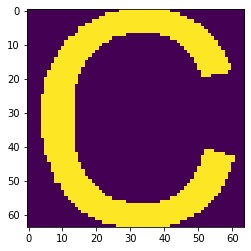

This is initial image:  Done 
Start finding nearest image.


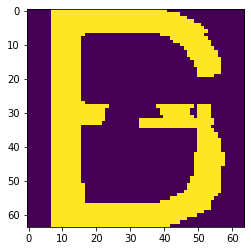

Nearest image:  Done
Accuracy: % 82.5927734375


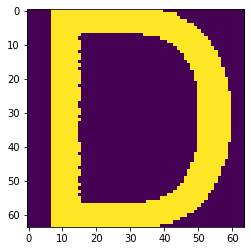

This is initial image:  Done 
Start finding nearest image.


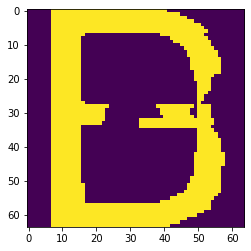

Nearest image:  Done
Accuracy: % 91.259765625


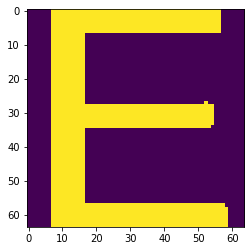

This is initial image:  Done 
Start finding nearest image.


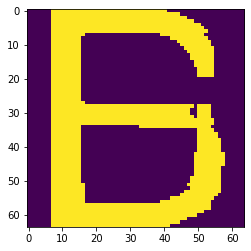

Nearest image:  Done
Accuracy: % 88.1591796875


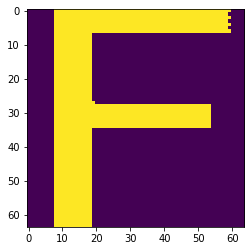

This is initial image:  Done 
Start finding nearest image.


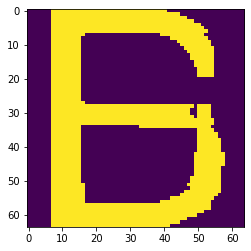

Nearest image:  Done
Accuracy: % 80.56640625


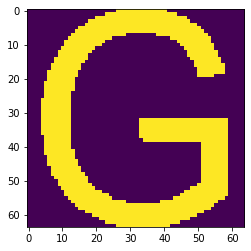

This is initial image:  Done 
Start finding nearest image.


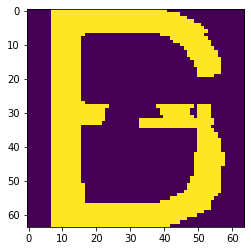

Nearest image:  Done
Accuracy: % 82.666015625


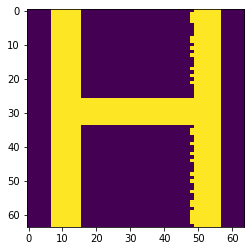

This is initial image:  Done 
Start finding nearest image.


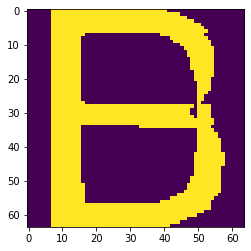

Nearest image:  Done
Accuracy: % 80.4931640625


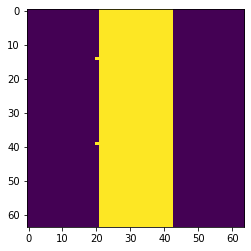

This is initial image:  Done 
Start finding nearest image.


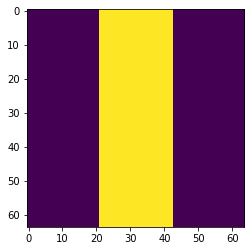

Nearest image:  Done
Accuracy: % 100.0


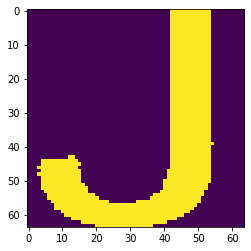

This is initial image:  Done 
Start finding nearest image.


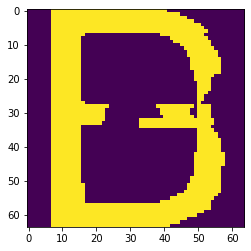

Nearest image:  Done
Accuracy: % 70.556640625
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 64 with 10% error in images:  82.6025390625


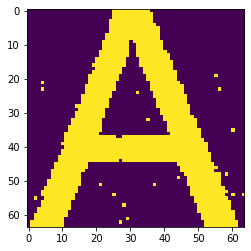

This is initial image:  Done 
Start finding nearest image.


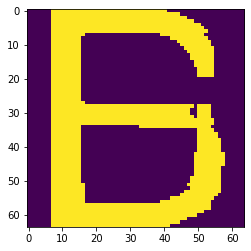

Nearest image:  Done
Accuracy: % 54.4677734375


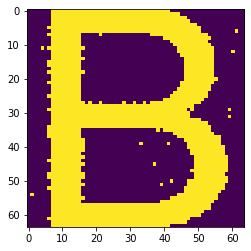

This is initial image:  Done 
Start finding nearest image.


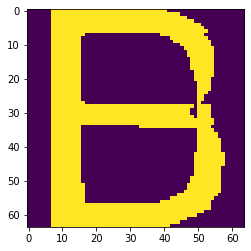

Nearest image:  Done
Accuracy: % 95.263671875


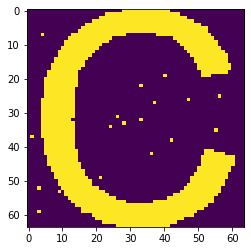

This is initial image:  Done 
Start finding nearest image.


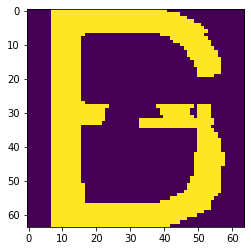

Nearest image:  Done
Accuracy: % 82.5927734375


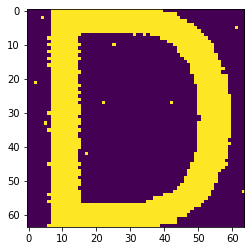

This is initial image:  Done 
Start finding nearest image.


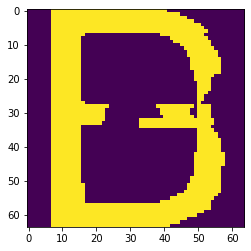

Nearest image:  Done
Accuracy: % 91.259765625


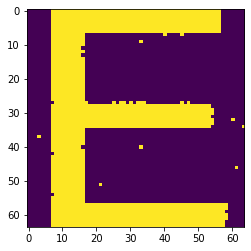

This is initial image:  Done 
Start finding nearest image.


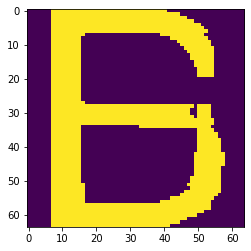

Nearest image:  Done
Accuracy: % 88.1591796875


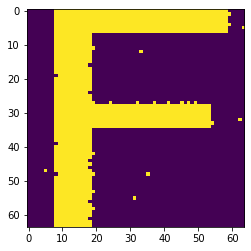

This is initial image:  Done 
Start finding nearest image.


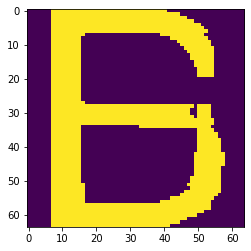

Nearest image:  Done
Accuracy: % 80.56640625


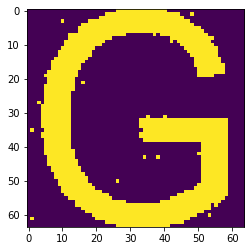

This is initial image:  Done 
Start finding nearest image.


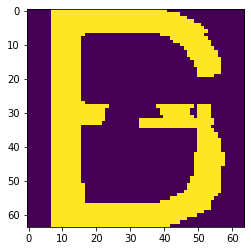

Nearest image:  Done
Accuracy: % 82.666015625


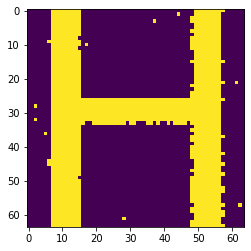

This is initial image:  Done 
Start finding nearest image.


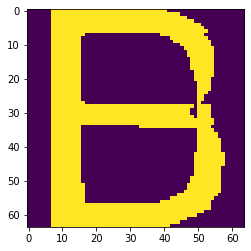

Nearest image:  Done
Accuracy: % 80.4931640625


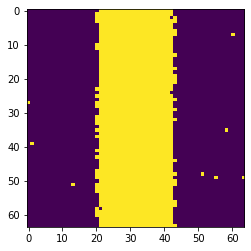

This is initial image:  Done 
Start finding nearest image.


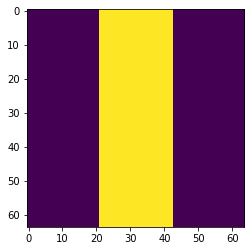

Nearest image:  Done
Accuracy: % 100.0


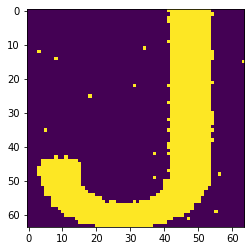

This is initial image:  Done 
Start finding nearest image.


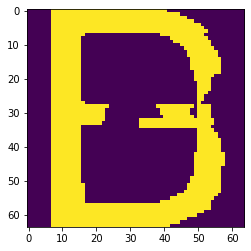

Nearest image:  Done
Accuracy: % 70.556640625
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 64 with 30% error in images:  82.6025390625


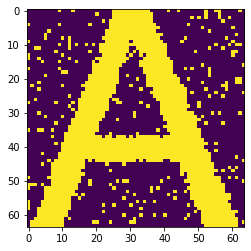

This is initial image:  Done 
Start finding nearest image.


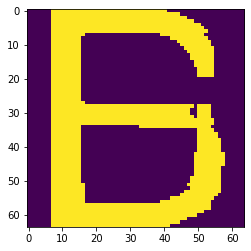

Nearest image:  Done
Accuracy: % 54.4677734375


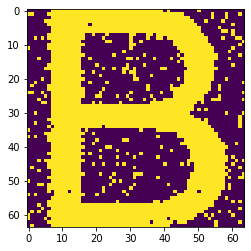

This is initial image:  Done 
Start finding nearest image.


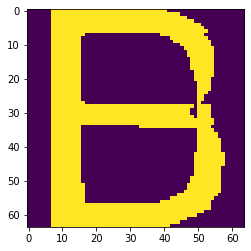

Nearest image:  Done
Accuracy: % 95.263671875


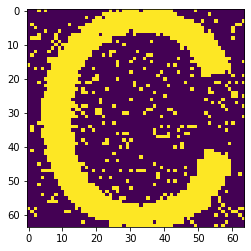

This is initial image:  Done 
Start finding nearest image.


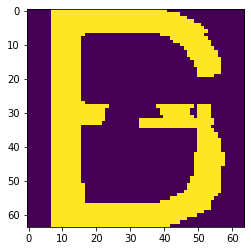

Nearest image:  Done
Accuracy: % 82.5927734375


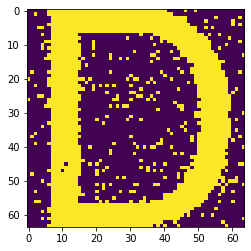

This is initial image:  Done 
Start finding nearest image.


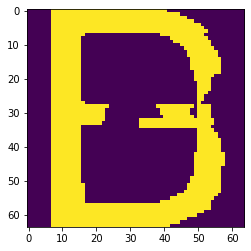

Nearest image:  Done
Accuracy: % 91.259765625


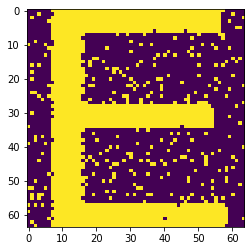

This is initial image:  Done 
Start finding nearest image.


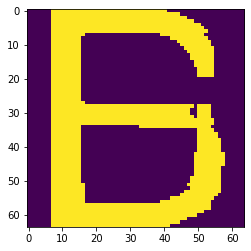

Nearest image:  Done
Accuracy: % 88.1591796875


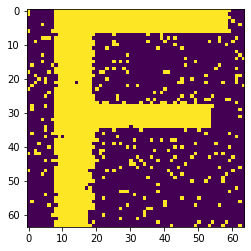

This is initial image:  Done 
Start finding nearest image.


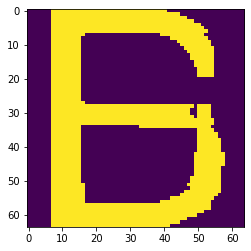

Nearest image:  Done
Accuracy: % 80.56640625


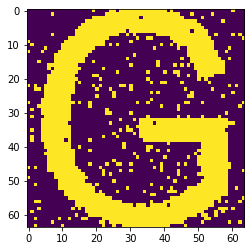

This is initial image:  Done 
Start finding nearest image.


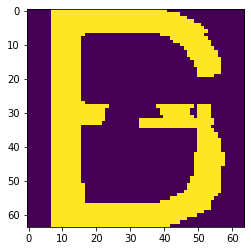

Nearest image:  Done
Accuracy: % 82.666015625


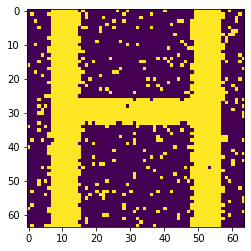

This is initial image:  Done 
Start finding nearest image.


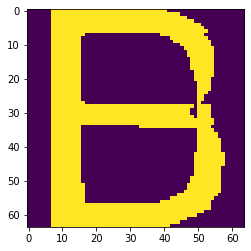

Nearest image:  Done
Accuracy: % 80.4931640625


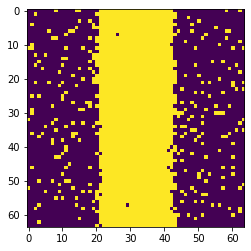

This is initial image:  Done 
Start finding nearest image.


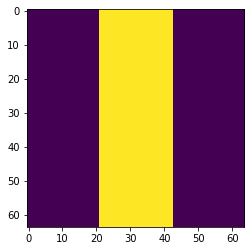

Nearest image:  Done
Accuracy: % 100.0


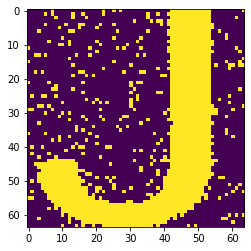

This is initial image:  Done 
Start finding nearest image.


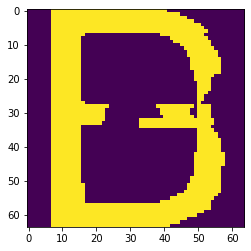

Nearest image:  Done
Accuracy: % 70.556640625
*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
General accuracy for font size 64 with 10% error in images:  82.6025390625


In [46]:
# Q1.3_graded
# Do not change the above line.

# This cell is for your codes.

import matplotlib.pyplot as plt
from PIL import Image, ImageFont
Iterations = 500
Sum = 0


# ***___***___***___***___***___***___***___***___***___***___***___*** #
# This part is to prove the correctness of algorithm with other characters.
Neurons = 400

Pattern16D = []
Pattern16TestWith10D = []
Pattern16TestWith30D = []
Pattern16TestWith60D = []

font_size = 16

font = ImageFont.truetype("/content/arial.ttf", font_size)
for char in "TO8$@":
    im = Image.Image()._new(font.getmask(char))
    im.save(f"{char}_{font_size}.bmp")

    # Save these with matrix structure.
    im = ImageToArray(im, Neurons, f"{char}_{font_size}.bmp")
    FinalResult = ConvertToBinary(im)
    Pattern16D.append(FinalResult)

    noisy = AddNoise(10, im, Neurons)
    Pattern16TestWith10D.append(noisy)

    noisy = AddNoise(30, im, Neurons)
    Pattern16TestWith30D.append(noisy)

    noisy = AddNoise(60, im, Neurons)
    Pattern16TestWith60D.append(noisy)

Weights = WeightMatrix(Pattern16D, Neurons)
for TestPattern, Pattern in zip(Pattern16TestWith10D, Pattern16D):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 16 with 10% error in images of different alphabet: ', Sum / len(Pattern16D))
Sum = 0

for TestPattern, Pattern in zip(Pattern16TestWith30D, Pattern16D):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 16 with 30% error in images of different alphabet: ', Sum / len(Pattern16D))
Sum = 0

for TestPattern, Pattern in zip(Pattern16TestWith60D, Pattern16D):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 16 with 60% error in images of different alphabet: ', Sum / len(Pattern16D))
Sum = 0

# ***___***___***___***___***___***___***___***___***___***___***___*** #
print(  "***___***___***___***___***___***___***___***___***___***___***___***" )
Neurons = 400

Pattern16 = []
Pattern16TestWith10 = []
Pattern16TestWith30 = []
Pattern16TestWith60 = []

font_size = 16

font = ImageFont.truetype("/content/arial.ttf", font_size)
for char in "ABCDEFGHIJ":
    im = Image.Image()._new(font.getmask(char))
    im.save(f"{char}_{font_size}.bmp")

    # Save these with matrix structure.
    im = ImageToArray(im, Neurons, f"{char}_{font_size}.bmp")
    FinalResult = ConvertToBinary(im)
    Pattern16.append(FinalResult)

    noisy = AddNoise(10, im, Neurons)
    Pattern16TestWith10.append(noisy)

    noisy = AddNoise(30, im, Neurons)
    Pattern16TestWith30.append(noisy)

    noisy = AddNoise(60, im, Neurons)
    Pattern16TestWith60.append(noisy)

Weights = WeightMatrix(Pattern16, Neurons)

for TestPattern, Pattern in zip(Pattern16TestWith10, Pattern16):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 16 with 10% error in images: ', Sum / len(Pattern16))
Sum = 0

for TestPattern, Pattern in zip(Pattern16TestWith30, Pattern16):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 16 with 30% error in images: ', Sum / len(Pattern16))
Sum = 0

for TestPattern, Pattern in zip(Pattern16TestWith60, Pattern16):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 16 with 60% error in images: ', Sum / len(Pattern16))
Sum = 0

# ***___***___***___***___***___***___***___***___***___***___***___*** #
print( "***___***___***___***___***___***___***___***___***___***___***___***")
Neurons = 1600

Pattern32 = []
Pattern32TestWith10 = []
Pattern32TestWith30 = []
Pattern32TestWith60 = []

font_size = 32

font = ImageFont.truetype("/content/arial.ttf", font_size)
for char in "ABCDEFGHIJ":
    im = Image.Image()._new(font.getmask(char))
    im.save(f"{char}_{font_size}.bmp")

    # Save these with matrix structure.
    im = ImageToArray(im, Neurons, f"{char}_{font_size}.bmp")
    FinalResult = ConvertToBinary(im)
    Pattern32.append(FinalResult)

    noisy = AddNoise(10, im, Neurons)
    Pattern32TestWith10.append(noisy)

    noisy = AddNoise(30, im, Neurons)
    Pattern32TestWith30.append(noisy)

    noisy = AddNoise(60, im, Neurons)
    Pattern32TestWith60.append(noisy)

Weights = WeightMatrix(Pattern32, Neurons)

for TestPattern, Pattern in zip(Pattern32TestWith10, Pattern32):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 32 with 10% error in images: ', Sum / len(Pattern32))
Sum = 0

for TestPattern, Pattern in zip(Pattern32TestWith30, Pattern32):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 32 with 30% error in images: ', Sum / len(Pattern32))
Sum = 0

for TestPattern, Pattern in zip(Pattern32TestWith60, Pattern32):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 32 with 60% error in images: ', Sum / len(Pattern32))
Sum = 0
# ***___***___***___***___***___***___***___***___***___***___***___*** #
print( "***___***___***___***___***___***___***___***___***___***___***___***" )
Neurons = 4096

Pattern64 = []
Pattern64TestWith10 = []
Pattern64TestWith30 = []
Pattern64TestWith60 = []

font_size = 64

font = ImageFont.truetype("/content/arial.ttf", font_size)
for char in "ABCDEFGHIJ":
    im = Image.Image()._new(font.getmask(char))
    im.save(f"{char}_{font_size}.bmp")

    # Save these with matrix structure.
    im = ImageToArray(im, Neurons, f"{char}_{font_size}.bmp")
    FinalResult = ConvertToBinary(im)
    Pattern64.append(FinalResult)

    noisy = AddNoise(10, im, Neurons)
    Pattern64TestWith10.append(noisy)

    noisy = AddNoise(30, im, Neurons)
    Pattern64TestWith30.append(noisy)

    noisy = AddNoise(60, im, Neurons)
    Pattern64TestWith60.append(noisy)

Weights = WeightMatrix(Pattern64, Neurons)

for TestPattern, Pattern in zip(Pattern64TestWith10, Pattern64):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 64 with 10% error in images: ', Sum / len(Pattern64))
Sum = 0

for TestPattern, Pattern in zip(Pattern64TestWith30, Pattern64):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 64 with 30% error in images: ', Sum / len(Pattern64))
Sum = 0

for TestPattern, Pattern in zip(Pattern64TestWith60, Pattern64):
    Result = UpdatePattern(Weights, TestPattern, Neurons, Iterations)
    Sum += Precision(Result, Pattern, Neurons)
    print('Accuracy: %', Precision(Result, Pattern, Neurons))

print("*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*")
print('General accuracy for font size 64 with 60% error in images: ', Sum / len(Pattern64))
Sum = 0


# Despite of the time I've spend on this question, it's not accurate enough! And I don't still know the ground!!
# Because the algorithm works for different patterns, but in this alphabet, doesn't work as well as it should.

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='green'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI992_HW3.ipynb`
    - `Q1.2.py`
    - `Q1.3.py`
    - `inverted_pendulum.fcl`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.